In [1]:
%matplotlib inline

In [1]:
!python --version

Python 3.8.3


In [2]:
from pandas import Panel

ImportError: cannot import name 'Panel' from 'pandas' (/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/__init__.py)

In [1]:
!pip install opencv-python

  Using cached https://files.pythonhosted.org/packages/9a/b5/a1bff73303ddade27d7e363b6820d22616415568db5ccb49dafb98f1d18e/opencv_python-4.5.2.52-cp38-cp38-macosx_10_15_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import cv2
import os

#os.chdir('')

img = cv2.imread('../Movie_Poster_Dataset/1980/tt0079302.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
type(img)

numpy.ndarray

In [9]:
cv2.imshow('Film', img)

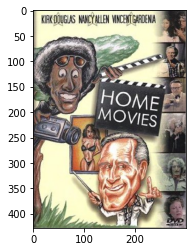

In [2]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(img)
plt.show()

In [5]:
img.shape

(428, 300, 3)

In [12]:
# see the highest, lowest and average pixel

for i in range(img.shape[2]):
    
    channel = img[:,:,i]
    print(channel.shape)
    print(channel.max())
    print(channel.min())
    print(channel.mean())

(428, 300)
255
0
129.9229984423676
(428, 300)
255
0
147.33393302180684
(428, 300)
255
0
156.87872274143302


In [24]:
# check on the info to see if can be acquired from the ID in JSON

import json 

filename = '../groundtruth/1980.txt'

n = 0

with open(filename) as fh:
    
    print(fh)
    
    for l in fh:
        #print(l)
        
        str_val = l.strip().split(':', 1)
    
        print(str_val)
        
        n+=1

        if n == 100:
            break

<_io.TextIOWrapper name='../groundtruth/1980.txt' mode='r' encoding='UTF-8'>
['{']
['"_id" ', ' ObjectId("56fb860e71a0651b0c306f55"),']
['"Language" ', ' "English",']
['"Box_office" ', ' "290,158,751",']
['"Country" ', ' "USA",']
['"Rated" ', ' "PG",']
['"imdbID" ', ' "tt0080684",']
['"Awards" ', ' "Won 1 Oscar. Another 15 wins & 18 nominations.",']
['"Poster" ', ' "http://ia.media-imdb.com/images/M/MV5BMjE2MzQwMTgxN15BMl5BanBnXkFtZTcwMDQzNjk2OQ@@._V1_SX300.jpg",']
['"Director" ', ' "Irvin Kershner",']
['"Released" ', ' "20 Jun 1980",']
['"Writer" ', ' "Leigh Brackett (screenplay), Lawrence Kasdan (screenplay), George Lucas (story)",']
['"imdbVotes" ', ' "799,579",']
['"Runtime" ', ' "124 min",']
['"Response" ', ' "True",']
['"imdbRating" ', ' "8.8",']
['"Title" ', ' "Star Wars: Episode V - The Empire Strikes Back",']
['"Genre" ', ' "Action, Adventure, Fantasy",']
['"Actors" ', ' "Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams",']
['"Type" ', ' "movie",']
['"Metascore" '

In [40]:

all_dict = {}

n = 0

with open(filename) as fh:
    
    print(fh)
    
    for l in fh:
        #print(l)
        
        str_val = l.strip().split(':', 1)
    
        #print(len(str_val))
        
        n+=1
        
        if (len(str_val) == 1) & (str_val[0] == '{'):
            film_dict = {}
        elif (len(str_val) == 1) & (str_val[0] == '}'):
            all_dict[n] = film_dict
        elif (len(str_val) == 2):
            key = str_val[0]
            value = str_val[1]
            #print(key.replace("\"", ""))
            #print(value.replace("\"", "").replace(",", ""))
            
            film_dict[key.replace("\"", "").strip()] = value.replace("\"", "").replace(",", "").strip()
            
        if n == 201:
            break
            
print(film_dict)      
print(all_dict)

<_io.TextIOWrapper name='../groundtruth/1980.txt' mode='r' encoding='UTF-8'>
{'_id': 'ObjectId(56fb860e71a0651b0c306f5e)', 'Language': 'English'}
{22: {'_id': 'ObjectId(56fb860e71a0651b0c306f55)', 'Language': 'English', 'Box_office': '290158751', 'Country': 'USA', 'Rated': 'PG', 'imdbID': 'tt0080684', 'Awards': 'Won 1 Oscar. Another 15 wins & 18 nominations.', 'Poster': 'http://ia.media-imdb.com/images/M/MV5BMjE2MzQwMTgxN15BMl5BanBnXkFtZTcwMDQzNjk2OQ@@._V1_SX300.jpg', 'Director': 'Irvin Kershner', 'Released': '20 Jun 1980', 'Writer': 'Leigh Brackett (screenplay) Lawrence Kasdan (screenplay) George Lucas (story)', 'imdbVotes': '799579', 'Runtime': '124 min', 'Response': 'True', 'imdbRating': '8.8', 'Title': 'Star Wars: Episode V - The Empire Strikes Back', 'Genre': 'Action Adventure Fantasy', 'Actors': 'Mark Hamill Harrison Ford Carrie Fisher Billy Dee Williams', 'Type': 'movie', 'Metascore': '79'}, 44: {'_id': 'ObjectId(56fb860e71a0651b0c306f56)', 'Language': 'English', 'Box_office': '

In [54]:
# loop through setup of folders to get max/min and average values.
import os 
import numpy as np

rootdir = '/Users/MStamp/Documents/2021 Learning/CV Course Continuation/CV-Assessments/Movie_Poster_Dataset/'

os.chdir(rootdir)

folders = os.listdir()

max_height = ['',0]
max_width = ['',0]

average_vals_per_channel = np.array(['',0,0,0,0]) # image - channel - min, max, average

print(folders)

for f in folders:
    
    if f == '.DS_Store':
        continue
    
    print(f) 
    
    os.chdir(rootdir + f)
    
    images = os.listdir()
    
    for i in images:
        img = cv2.imread(i, cv2.COLOR_BGR2RGB)
        
        #print(img.shape[0])
        #print(img.shape[1])
        
        if img.shape[0] > max_height[1]:
            max_height = [f + "/" + i, img.shape[0]]
            
        if img.shape[1] > max_width[1]:
            max_width = [f + "/" + i, img.shape[1]]
            
        for c in range(img.shape[2]):
            channel = img[:,:,c]
            channel = np.array([i, c, channel.max(), channel.min(), channel.mean()])
            
            if c == 0:
                all_channels = channel
                
            else:
                all_channels = np.concatenate((all_channels, channel), axis=0)
        
        average_vals_per_channel = np.concatenate((average_vals_per_channel, all_channels), axis=0)

['2013', '2014', '2015', '2012', '1988', '1981', '.DS_Store', '1986', '1987', '1980', '1989', '1993', '1994', '1995', '1992', '2008', '2001', '2006', '2007', '2000', '2009', '2010', '2011', '1985', '1982', '1983', '1984', '1997', '1990', '1999', '1998', '1991', '1996', '2005', '2002', '2003', '2004']
2013
2014
2015
2012
1988
1981
1986
1987
1980
1989
1993
1994
1995
1992
2008
2001
2006
2007
2000
2009
2010
2011
1985
1982
1983
1984
1997
1990
1999
1998
1991
1996
2005
2002
2003
2004


In [55]:
max_height

['1983/tt0085236.jpg', 581]

In [56]:
max_width

['2013/tt1786751.jpg', 300]

In [57]:
average_vals_per_channel

array(['', '0', '0', ..., '255', '3', '227.71706697459584'], dtype='<U18')